2.	Agrega una imagen estable y centrada de tu rostro a una carpeta compartida junto con tus compañeros de clase.

•	Edita tu imagen para que sea de 256x256 píxeles, en escala de grises (un solo canal)
•	Grafica tu rostro editado
•	Calcula y grafica el rostro promedio de la cohorte.
•	¿Qué tan distante está tu rostro del promedio? ¿Cómo lo medirías?
•	Let’s create the unsupervised Python package
•	Creemos el paquete no supervisado de Python
•	Misma API que scikit-learn: fit(), fit_transform(), transform(), hiperparámetros en la inicialización
•	Gestiona las dependencias con Pipenv o Poetry
•	Implementa SVD desde cero usando Python y NumPy
•	Implementa PCA desde cero usando Python y NumPy [https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py, https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ip ynb]
•	Implementa t-SNE desde cero usando Python y NumPy [https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

images = []
images_path1 = "./drive/MyDrive/pictures_class/"

for filename in os.listdir(images_path1):
    img = cv2.imread(os.path.join(images_path1, filename))
    if img is not None:
        images.append(img)

for i in range(len(images)):
    images[i] = cv2.resize(images[i], (256, 256))
    # plt.figure()
    # plt.imshow(images[i], cmap="gray")

# Cargar imagen y redimensionarla
my_image = cv2.imread(os.path.join(images_path1, "CarlosSC.jpeg"))
my_image = cv2.resize(my_image, (256, 256))

# plot image
plt.imshow(cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY), cmap="gray")
plt.title("My Image")
plt.show()

image_matrix = np.array(images)
avg_matrix = np.mean(image_matrix, axis=0).astype(np.uint8)
avg_matrix = cv2.resize(avg_matrix, (256, 256))
avg_matrix = cv2.cvtColor(avg_matrix, cv2.COLOR_BGR2RGB)
plt.imshow(avg_matrix)
plt.title("Images Average")
plt.show()

image_diff = my_image - avg_matrix
plt.imshow(image_diff)
plt.title("Images Diff")
plt.show()

image_distance = np.linalg.norm(my_image - avg_matrix)
print("Euclidean Distance:", image_distance)


error: ignored

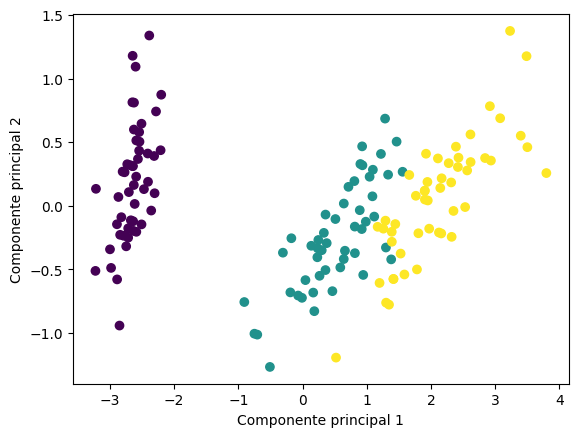

In [39]:
# PCA con sklearn:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar los datos
iris = load_iris()
X = iris.data

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizar los datos transformados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [41]:
# realizar PCA con sklearn:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar los datos
# iris = load_iris()
# X = iris.data
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [7, 8, 9]])

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

print("Matriz original:")
print(X)
print("Matriz PCA:")
print(X_pca)

# # Visualizar los datos transformados
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('Componente principal 1')
# plt.ylabel('Componente principal 2')
# plt.show()

Matriz original:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [7 8 9]]
Matriz PCA:
[[ 6.49519053e+00  3.41647519e-16]
 [ 1.29903811e+00 -6.12811374e-17]
 [-3.89711432e+00  2.74492743e-16]
 [-3.89711432e+00  2.74492743e-16]]


In [42]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Creamos una matriz de ejemplo
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [7, 8, 9]])

# Creamos un objeto TruncatedSVD con 2 componentes
svd = TruncatedSVD(n_components=2)

# Aplicamos la transformación SVD a la matriz X
X_svd_fit_t = svd.fit_transform(X)
X_svd_fit = svd.fit(X)

print("Matriz original:")
print(X)
print("Matriz SVD X_svd_fit_t:")
print(X_svd_fit_t)

inverse = svd.inverse_transform(X_svd_fit_t)
print("Matriz inverse SVD:")
print(inverse)

Matriz original:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [7 8 9]]
Matriz SVD X_svd_fit_t:
[[ 3.60785534  0.9916551 ]
 [ 8.76703699  0.37291066]
 [13.92621865 -0.24583377]
 [13.92621865 -0.24583377]]
Matriz inverse SVD:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]
 [7. 8. 9.]]


In [44]:
svd.inverse_transform()

TypeError: ignored